In [1]:
%matplotlib inline 
import optoanalysis
from numpy import pi

# Example of how to load a data file and analyse / visualise various properties

In [2]:
optoanalysis.properties["default_fig_size"] = (7, 5) # sets default fig size for optoanalysis plots

In [3]:
data = optoanalysis.load_data("testData.raw")

Loading data from testData.raw


### Plotting the time trace

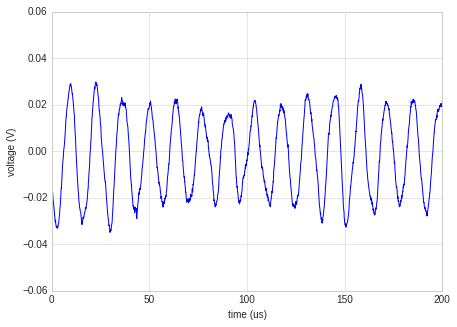

(<matplotlib.figure.Figure at 0x7f8d4169ec88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8d413f5ac8>)

In [4]:
data.plot_time_data(timeStart=0, timeEnd=200, units='us')

### Plotting the power spectral density (PSD)

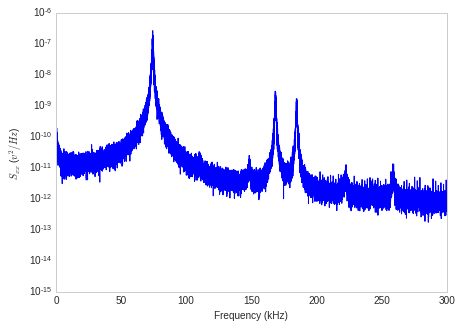

In [5]:
fig, ax = data.plot_PSD([0, 300]); # Plot PSD of loaded data

### Fitting to a peak in the PSD

found best


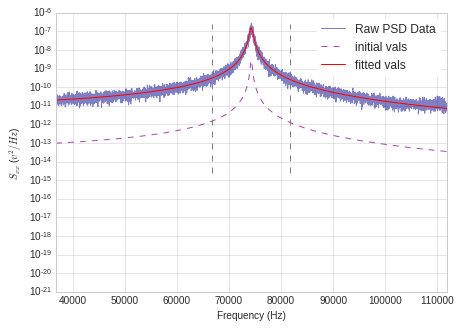



A: 548621211346.4878 +- 1.518599585030561% 
Trap Frequency: 466605.4199560843 +- 0.014086349536246044% 
Big Gamma: 3992.323366562553 +- 3.2497134412173843% 


In [6]:
W_trap_z, A, Gamma, fig, ax = data.get_fit_auto(75e3); # fit to Z peak of loaded data and extracts the parameters A (The A parameter), W_trap_z (the trap frequency in Z) and Gamma (the damping on Z)

### Extracting further parameters from the data

In [7]:
# next 3 lines are just me getting the pressure value from a file
with open("testDataPressure.dat", 'r') as file: 
    for line in file:
        pressure = float(line.split("mbar")[0])

R, M, ConvFactorZ = data.extract_parameters(pressure, 0.15) # extracts the radius of the particle, mass and conversion factor for the z degree of freedom (used to convert volts to meters of particle motion)

In [8]:
print(R, M, ConvFactorZ)

(1.45+/-0.22)e-07 (2.3+/-0.7)e-17 (1.10+/-0.34)e+06


In [9]:
F_trap_z = W_trap_z/(2*pi)

In [10]:
print(F_trap_z)

74263+/-10


### Plotting the phase space representation of a degree of motion

filtering data


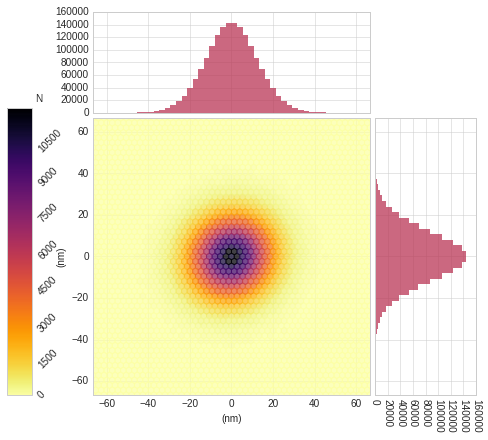

In [11]:
fig, axscatter, axhistx, axhisty, cbar = data.plot_phase_space(F_trap_z.n, ConvFactorZ, FractionOfSampleFreq=3, figsize=[7, 7]); # this filters for the z motion, calculates the phase space of this motion and plots it using the qplots library

found best


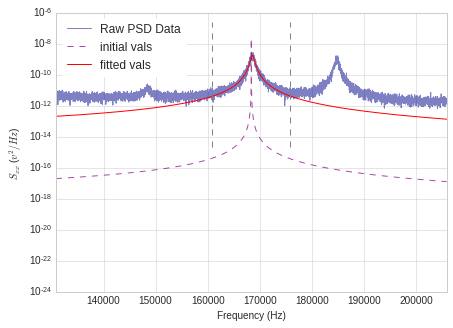



A: 41671522193.62844 +- 1.5048839857496519% 
Trap Frequency: 1059286.9112359448 +- 0.008296517428258338% 
Big Gamma: 4530.375868165643 +- 3.2509953331880586% 
found best


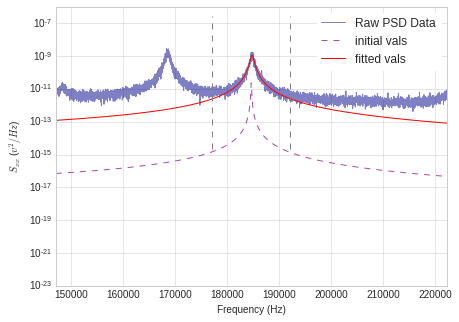



A: 29346150102.71962 +- 1.5008668421878193% 
Trap Frequency: 1161182.0446442377 +- 0.007815161493549834% 
Big Gamma: 4404.643455512914 +- 3.3146231843259844% 


In [12]:
W_trap_x, A, Gamma, fig, ax = data.get_fit_auto(160e3); # fits to the x peak
R, M, ConvFactorX = data.extract_parameters(pressure, 0.15) # extracts parameters from x peak

W_trap_y, A, Gamma, fig, ax = data.get_fit_auto(180e3); # fits to the y peak
R, M, ConvFactorY = data.extract_parameters(pressure, 0.15)# extracts parameters from y peak

In [13]:
print(ConvFactorZ, ConvFactorX, ConvFactorY) # conversion factor for z is larger than conversion factor for x and y (which have similar values) as our detection more sesitive to z than x and y

(1.10+/-0.34)e+06 (2.3+/-0.7)e+05 (2.1+/-0.6)e+05


### Extracting the motion in volts by filtering

filtering Z
filtering X
filtering Y


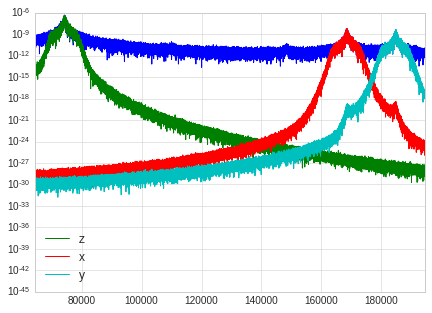

In [14]:
z, x, y, t, fig, ax = data.extract_ZXY_motion([75e3, 165e3, 180e3], 10e3, [10e3, 10e3, 10e3], subSampleFraction=3) # extracts the motion of z, x and y

In [15]:
znm = z/ConvFactorZ.n*1e9

## Plotting Wigner

In [16]:
sample_freq = data.SampleFreq/3

In [17]:
wigner, centres = optoanalysis.get_wigner(znm, F_trap_z.n, sample_freq, histbins=1000)

(<matplotlib.figure.Figure at 0x7f8d3eb4ac50>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f8d3eb43828>)

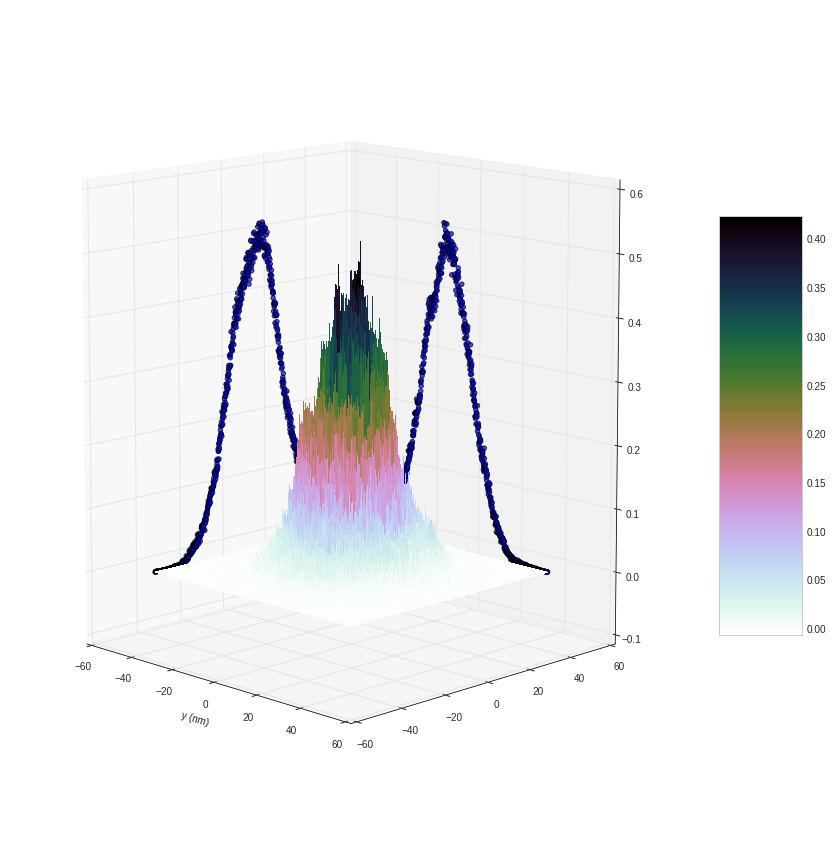

In [18]:
optoanalysis.plot_wigner3d(wigner, centres, "nm")

(<matplotlib.figure.Figure at 0x7f8d3e8af0b8>,
 <matplotlib.colorbar.Colorbar at 0x7f8d0c38c668>)

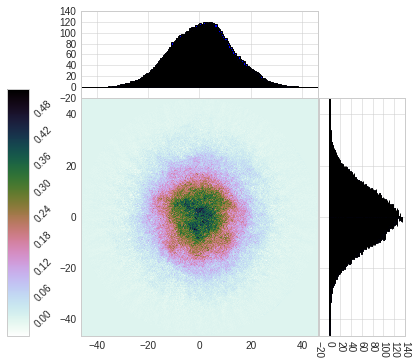

In [19]:
optoanalysis.plot_wigner2d(wigner, centres)

### Animating the particle's motion

This will take ~ 0.08458333333333333 minutes


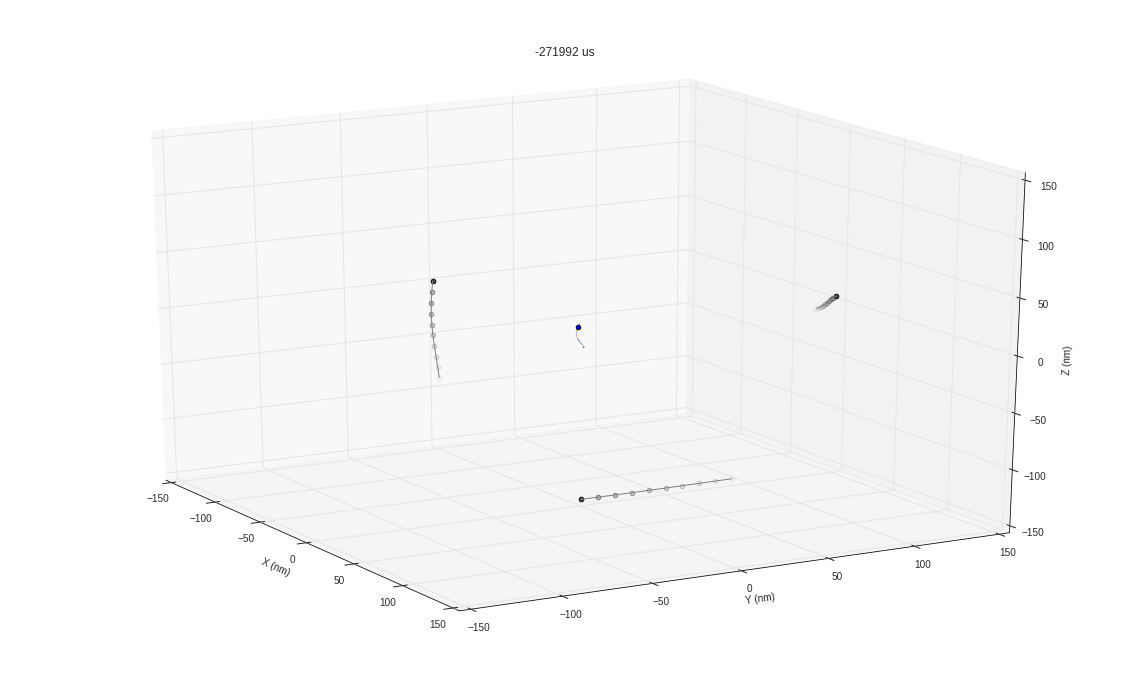

In [20]:
optoanalysis.animate(z, x, y, [ConvFactorZ.n, ConvFactorX.n, ConvFactorY.n], t, 150, timeSteps=25) # animates the motion of z, x and y

# Plotting multiple data files and calculating temperature with a reference data set

In [21]:
PRef = 2.703
Pcooled = 0.0232

### We can load the reference (uncooled at high pressure) and cooled data

In [22]:
ref = optoanalysis.load_data("CH1_RUN00000001_REPEAT0000.raw")
cooldata = optoanalysis.load_data("CH1_RUN00000036_REPEAT0000.raw")

Loading data from CH1_RUN00000001_REPEAT0000.raw
Loading data from CH1_RUN00000036_REPEAT0000.raw


/home/ash/anaconda2/envs/python3/lib/python3.5/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 1000000, is greater than input length = 250002, using nperseg = 250002
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


### we can plot the 2 PSDs together

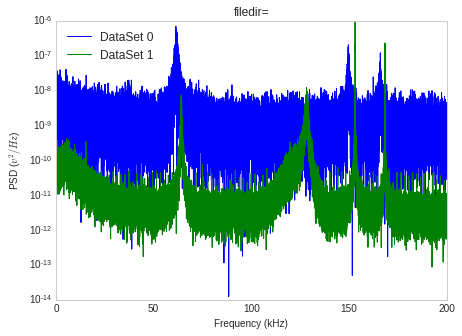

(<matplotlib.figure.Figure at 0x7f8d07e760f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8d07bc1668>)

In [23]:
optoanalysis.multi_plot_PSD([ref, cooldata], [0, 200])

In [24]:
ref.get_PSD(0.5e5)

(array([  0.00000000e+00,   4.99999994e+01,   9.99999988e+01, ...,
          1.24989999e+06,   1.24994999e+06,   1.24999999e+06]),
 array([  1.28149734e-08,   6.24827096e-08,   5.09595420e-08, ...,
          1.10449946e-09,   1.16330389e-09,   3.97229587e-10]))

### We can fit to the Z, X and Y peaks

found best


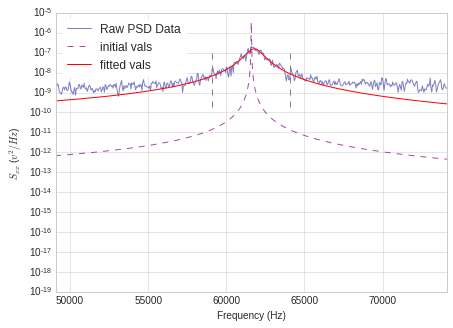



A: 1176625371481.0798 +- 8.485884211418862% 
Trap Frequency: 388312.81845422875 +- 0.05534503465645279% 
Big Gamma: 7075.83189874807 +- 7.357867729789741% 
found best


/home/ash/anaconda2/envs/python3/lib/python3.5/site-packages/optoanalysis-4.0.1-py3.5.egg/optoanalysis/optoanalysis.py:495: UserWarning: range is too small, returning NaN
  _warnings.warn("range is too small, returning NaN", UserWarning)


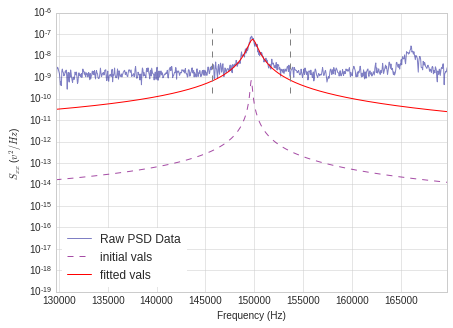



A: 1571242482189.7734 +- 4.1922644494661725% 
Trap Frequency: 941415.2071361727 +- 0.020924166217541108% 
Big Gamma: 5590.661863199339 +- 6.029150823921562% 
found best


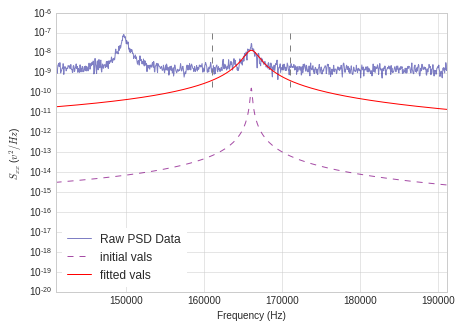



A: 1775528043681.7756 +- 7.9874541675196555% 
Trap Frequency: 1043451.258463454 +- 0.04017237574947875% 
Big Gamma: 11162.33998715433 +- 8.53404814945303% 


In [25]:
W_trap_z, A, Gamma, fig, ax = ref.get_fit_auto(60e3, MaxWidth=5000); # fits to the z peak
R, M, ConvFactorZ = ref.extract_parameters(PRef, 0.15) # extracts parameters from z peak

W_trap_x, A, Gamma, fig, ax = ref.get_fit_auto(150e3); # fits to the x peak
R, M, ConvFactorX = ref.extract_parameters(PRef, 0.15) # extracts parameters from x peak

W_trap_y, A, Gamma, fig, ax = ref.get_fit_auto(166e3, MaxWidth=10e3); # fits to the y peak
R, M, ConvFactorY = ref.extract_parameters(PRef, 0.15)# extracts parameters from y peak

In [26]:
fz = W_trap_z/(2*pi)
fx = W_trap_x/(2*pi)
fy = W_trap_y/(2*pi)

### We can extract the motion in Z, X and Y in nm and animate it

filtering Z
filtering X
filtering Y


/home/ash/anaconda2/envs/python3/lib/python3.5/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 1000000, is greater than input length = 250001, using nperseg = 250001
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


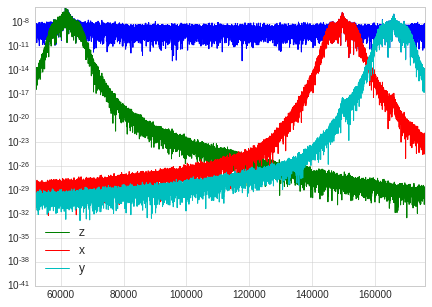

This will take ~ 0.08458333333333333 minutes


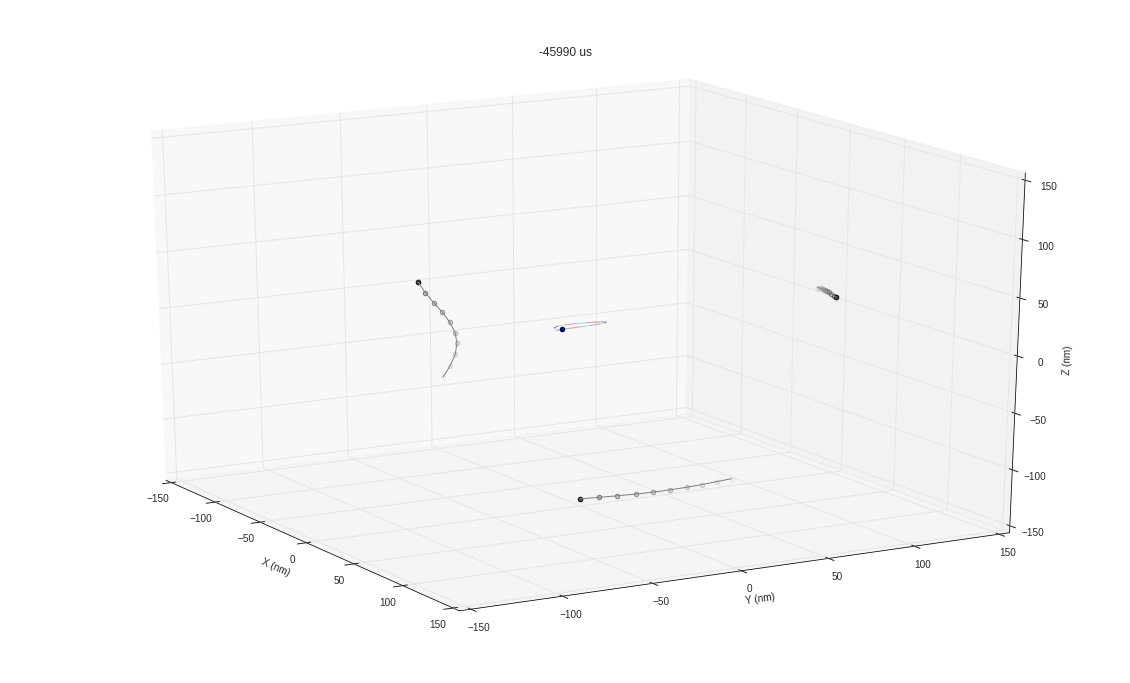

In [27]:
z, x, y, t, fig, ax = ref.extract_ZXY_motion([fz, fx, fy], 6e3, [10e3, 10e3, 10e3], subSampleFraction=1) # extracts the motion of z, x and y
optoanalysis.animate(z, x, y, [ConvFactorZ.n, ConvFactorX.n, ConvFactorY.n], t, 150, timeSteps=25, filename="referenceParticle") # animates the motion of z, x and y

filtering Z
filtering X
filtering Y


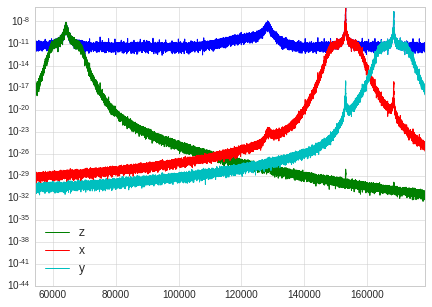

In [ ]:
z, x, y, t, fig, ax = cooldata.extract_ZXY_motion([fz, fx, fy], 6e3, [10e3, 10e3, 10e3], subSampleFraction=1) # extracts the motion of z, x and y

In [ ]:
optoanalysis.animate(z, x, y, [ConvFactorZ.n, ConvFactorX.n, ConvFactorY.n], t, 150, timeSteps=25, filename="coolParticle") # animates the motion of z, x and y

This will take ~ 0.08458333333333333 minutes


### We can calculate the temperature of the cooled dataset in Z by fitting to Z and then using `calc_temp`

In [ ]:
W_trap_z, A, Gamma, fig, ax = ref.get_fit_auto(60e3, MaxWidth=5000); # fits to the z peak
W_trap_z, A, Gamma, fig, ax = cooldata.get_fit_auto(60e3, MaxWidth=5000); # fits to the z peak

#### Now we have fit to z for both the reference and data of interest we can get the temperature

In [ ]:
optoanalysis.calc_temp(ref, cooldata)

#### We can also extract the contribution to the damping from the environment and from cooling

In [ ]:
optoanalysis.calc_gamma_components(ref, cooldata)